In [1]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import statistics

In [3]:
df1=sns.load_dataset("iris")

In [4]:
df=sns.load_dataset("tips")
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [5]:
np.mean(df["total_bill"])

19.785942622950824

In [6]:
np.median(df["total_bill"])

17.795

In [7]:
df['total_bill'].mean()

19.785942622950824

In [8]:
df["total_bill"].mode()

0    13.42
Name: total_bill, dtype: float64

In [9]:
statistics.mode(df["total_bill"])

13.42

C:\Users\spand\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='total_bill'>

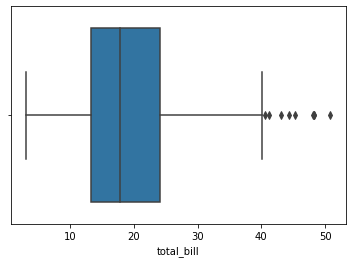

In [10]:
sns.boxplot(df["total_bill"])

<AxesSubplot:xlabel='tip', ylabel='Count'>

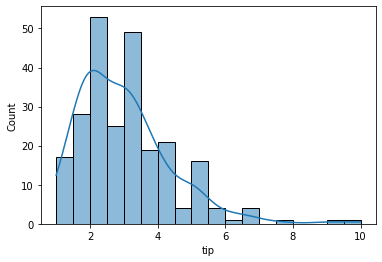

In [11]:
sns.histplot(df["tip"], kde=True)

C:\Users\spand\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='day', ylabel='count'>

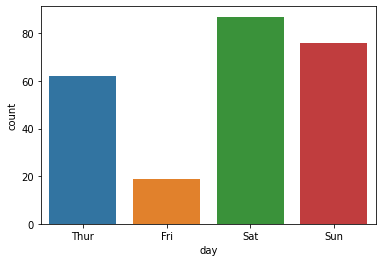

In [12]:
sns.countplot(df["day"])

C:\Users\spand\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sex', ylabel='count'>

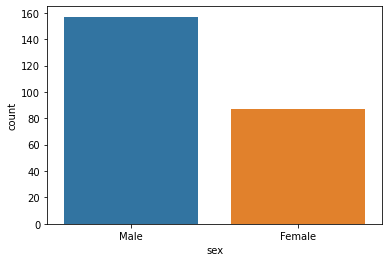

In [13]:
sns.countplot(df['sex'])

C:\Users\spand\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='time', ylabel='count'>

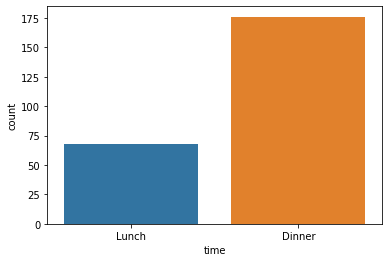

In [14]:
sns.countplot(df['time'])

In [15]:
np.percentile(df['total_bill'], [25,50,75])

array([13.3475, 17.795 , 24.1275])

In [16]:
np.percentile(df1['sepal_length'],[25,75])

array([5.1, 6.4])

In [17]:
df1.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [35]:
dataset= [11,10,12,14,12,15,14,13,15,102,12,14,17,19,107, 10,13,12,14,12,108,12,11,14,13,15,10,15,12,10,14,13,15,10]

#zscore, IQR

outliars=[]

def detect_outliars(data):
    threshold=3 #3 std
    mean=np.mean(data)
    std=np.std(data)
    
    for i in data:
        zscore=(i-mean)/std
        if np.abs(zscore)>threshold:
            outliars.append(i)
            
    return outliars


In [42]:
np.mean(dataset)


21.176470588235293

In [37]:
detect_outliars(dataset)

[102, 107, 108]

In [32]:
np.abs(-12.1321)

12.1321

In [38]:
s=set(dataset)

In [39]:
s

{10, 11, 12, 13, 14, 15, 17, 19, 102, 107, 108}

In [44]:
dataset=sorted(dataset)
dataset


[10,
 10,
 10,
 10,
 10,
 11,
 11,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 13,
 13,
 13,
 13,
 14,
 14,
 14,
 14,
 14,
 14,
 15,
 15,
 15,
 15,
 15,
 17,
 19,
 102,
 107,
 108]

In [45]:
q1,q3=np.percentile(dataset, [25,75])

In [46]:
print(q1,q3)

12.0 15.0


In [48]:
iqr=q3-q1
iqr

3.0

In [50]:
lower_fence=q1-1.5*iqr
higher_fence=q3+1.5*iqr
print(lower_fence, higher_fence)

7.5 19.5


In [58]:
outliars=[]
for i in dataset:
    if i<lower_fence or i>higher_fence:
        outliars.append(i)

outliars

[102, 107, 108]

In [5]:
df.corr()#default pearson

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


In [6]:
df.corr(method='spearman')

,total_bill,tip,size
total_bill,1.000000,0.678968,0.604791
tip,0.678968,1.000000,0.468268
size,0.604791,0.468268,1.000000


In [7]:
df.cov()

,total_bill,tip,size
total_bill,79.252939,8.323502,5.065983
tip,8.323502,1.914455,0.643906
size,5.065983,0.643906,0.904591
